In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
data_dir = Path(f"test/")
dfs = [
    pd.read_csv(f)
    for f in data_dir.glob("*.csv")
]

In [4]:
for _df in dfs:
    print(_df.damper_name.iloc[0], _df.batch_size.nunique())
    if _df.damper_name.iloc[0] == "padadamp" and _df.batch_size.nunique() <= 2:
        print("  setting damper_name='padadamplr'")
        _df["damper_name"] = "padadamplr"
    if _df.damper_name.iloc[0] == "damper":
        _df["damper_name"] = "adagrad"

padadamp 2
  setting damper_name='padadamplr'
damper 1
geodamp 3
geodamplr 1
padadamp 119


In [5]:
[df.damper_name.iloc[-1] for df in dfs]

['padadamplr', 'adagrad', 'geodamp', 'geodamplr', 'padadamp']

In [6]:
df = pd.concat(dfs)

In [7]:
df.columns

Index(['partial_fit_calls', 'test_score', 'test_loss', 'train_score',
       'train_loss', 'train_eg', 'test_eg', 'max_iter', 'damper_name',
       'batch_growth_rate', 'device', 'dwell', 'initial_batch_size', 'lr',
       'max_batch_size', 'momentum', 'seed', 'weight_decay', 'model_updates',
       'num_examples', 'len_dataset', 'pada_damping', 'damping', 'lr_',
       'batch_size', 'opt', 'dampingdelay', 'dampingfactor',
       'static_batch_size'],
      dtype='object')

(0.5, 0.7917912742890441)

(1024, 156676.7933299125)

(1024, 156676.7933299125)

(0.5, 0.7917912742890441)

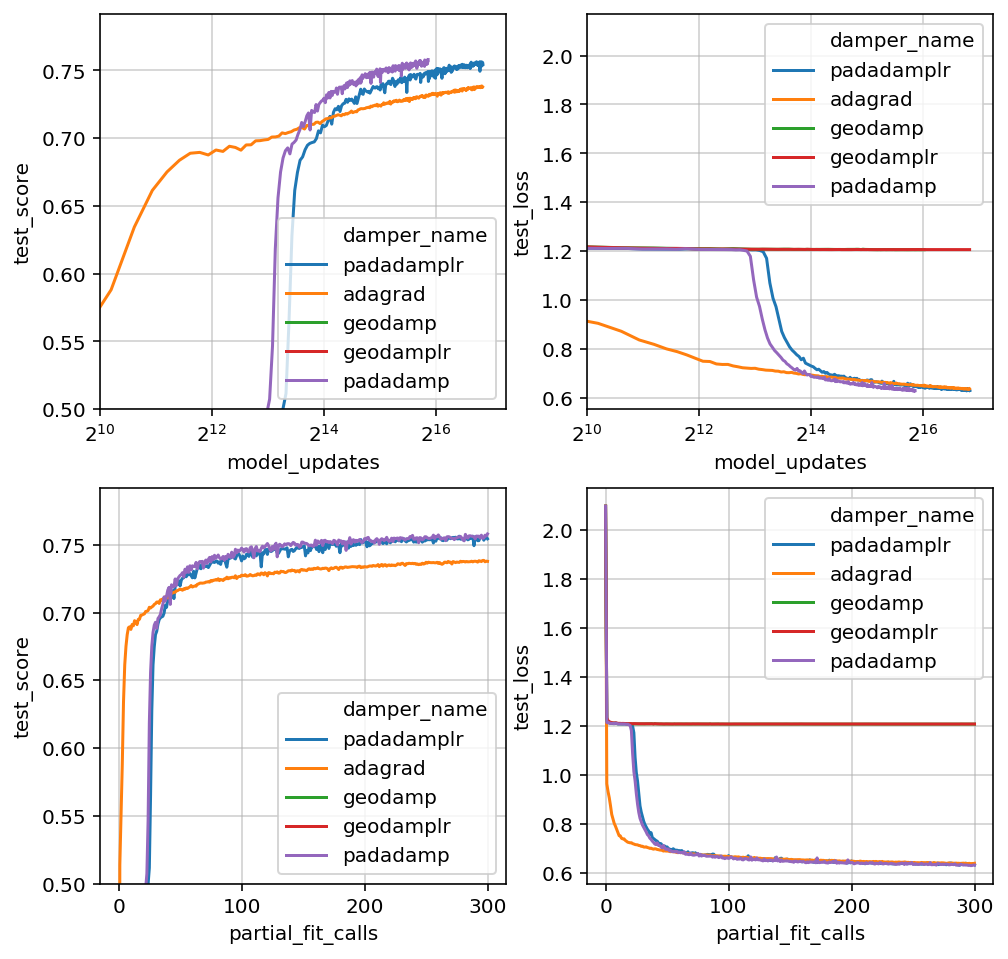

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

w = 4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2 * w, 2 * w))

for i, x in enumerate(["model_updates", "partial_fit_calls"]):
    for j, y in enumerate(["test_score", "test_loss"]):
#     for j, y in enumerate(["train_score", "train_loss"]):
        ax = sns.lineplot(
            x=x,
            y=y,
            hue="damper_name",
            data=df,
            ax=axs[i][j],
        )
        ax.grid(alpha=0.6)
        if "score" in y:
            ax.set_ylim(0.50, None)
            
#         elif "loss" in y:
#             ax.set_ylim(0.7, 1)
        if "updates" in x:
            ax.set_xscale("log", basex=2)
            ax.set_xlim(2**10, None)
        # ax.set_ylim(0.7, 1)

(0.5, 0.808324)

(1024, 156676.7933299125)

(1024, 156676.7933299125)

(0.5, 0.808324)

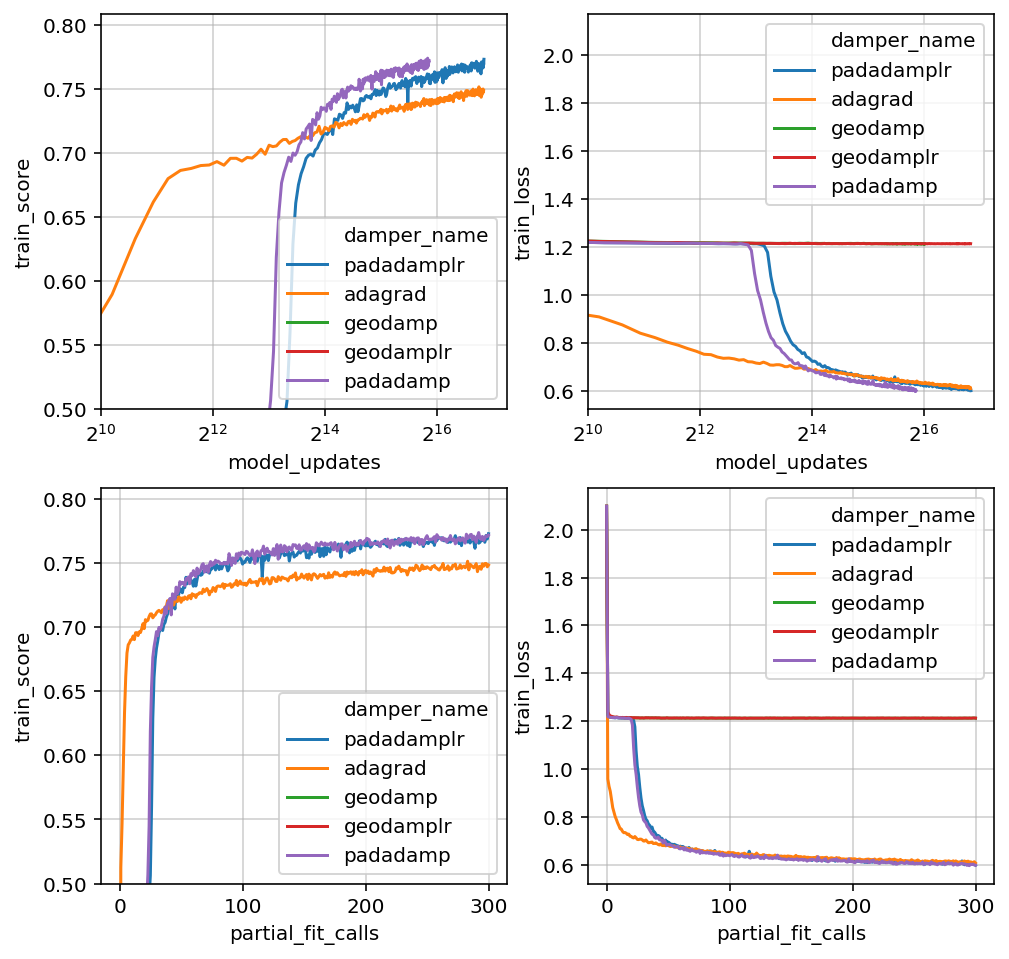

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

w = 4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2 * w, 2 * w))

for i, x in enumerate(["model_updates", "partial_fit_calls"]):
#     for j, y in enumerate(["test_score", "test_loss"]):
    for j, y in enumerate(["train_score", "train_loss"]):
        ax = sns.lineplot(
            x=x,
            y=y,
            hue="damper_name",
            data=df,
            ax=axs[i][j],
        )
        ax.grid(alpha=0.6)
        if "score" in y:
            ax.set_ylim(0.50, None)
            
#         elif "loss" in y:
#             ax.set_ylim(0.7, 1)
        if "updates" in x:
            ax.set_xscale("log", basex=2)
            ax.set_xlim(2**10, None)
        # ax.set_ylim(0.7, 1)

In [10]:
show = df.copy()
show["damper_name_show"] = show["damper_name"]
n = "Adagrad"
show.loc[show.damper_name == n.lower(), "damper_name_show"] = n
n = "PadaDamp"
show.loc[show.damper_name == n.lower(), "damper_name_show"] = n
n = "padadamplr"
show.loc[show.damper_name == n, "damper_name_show"] = "PadaDamp LR"
# n = 

In [11]:
DAMPERS = ["adagrad", "geodamplr", "padadamp", "padadamplr"]
LABELS = {"adagrad": "Adagrad", "geodamplr": "GeoDamp LR", "padadamp": "PadaDamp", "padadamplr": "PadaDamp LR"}
COLORS = ["C3", "C2", "C0", "C1"]
STYLES = ["-.", "--", "-", "--"]

DAMPERS = ["padadamp", "padadamplr", "adagrad"]
COLORS = ["C0", "C1", "C3"]
STYLES = ["-", "-.", "--"]

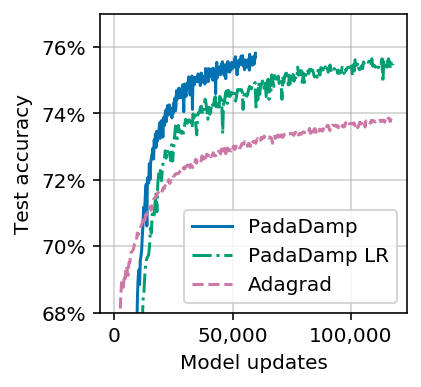

In [12]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

def lineplot(df, x, y, labels=None, hue_order=None, hues=None, styles=None, w=3):
    fig, ax = plt.subplots(figsize=(w, w))
    if hue_order is None:
        hue_order = sorted(df.damper_name.unique())
    if labels is None:
        labels = {}
    for k, d in enumerate(hue_order):
        if "geo" in d:
            continue
        label = labels.get(d, d)
        ax = df[df.damper_name == d].plot(
            x=x,
            y=y,
            style="{}{}".format(hues[k], styles[k]),
            ax=ax,
            label=label,
        )
    return fig, ax

x = "model_updates"
y = "test_score"

w = 2.75
kwargs = dict(hues=COLORS, hue_order=DAMPERS, styles=STYLES, labels=LABELS, w=w)
fig, ax = lineplot(show, x, y, **kwargs)
ylim = (0.68, 0.77)
ax.set_ylim(*ylim)
ax.grid(alpha=0.6)
ax.set_ylabel("Test accuracy")
ax.set_xlabel("Model updates")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v):,}" if v > 0 else "0"))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v / 1e3)}e3" if v > 0 else "0"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v * 100)}%"))
fig.savefig("figs/padadamp-mu.pdf", bbox_inches="tight")


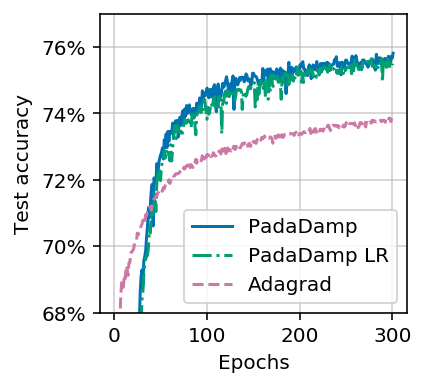

In [13]:
show["epochs"] = show["num_examples"] / show["len_dataset"]
x = "epochs"
y = "test_score"

fig, ax = lineplot(show, x, y, **kwargs)
ax.set_ylim(*ylim)
ax.grid(alpha=0.6)
ax.set_ylabel("Test accuracy")
ax.set_xlabel("Epochs")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v * 100)}%"))
fig.savefig("figs/padadamp-epochs.pdf", bbox_inches="tight")


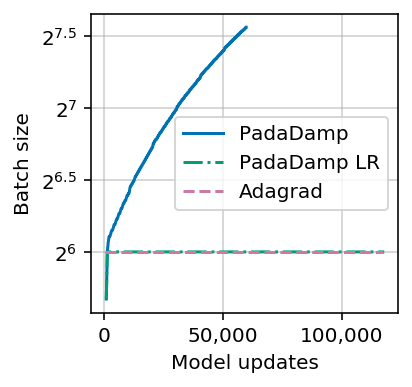

In [14]:
import numpy as np
x = "model_updates"
y = "batch_size"

fig, ax = lineplot(show, x, y, **kwargs)
# ax.set_ylim(0.68, 0.77)
ax.grid(alpha=0.6)
ax.set_ylabel("Batch size")
ax.set_xlabel("Model updates")
ax.set_yscale("log", basey=2)
# ys = [32 * i for i in range(10)]
ys = [2**i for i in [6, 6.5, 7, 7.5]]
ax.yaxis.set_major_locator(plt.FixedLocator(ys))

def y_fmt(v, _):
    pwr = np.log2(v)
    if np.allclose(pwr, np.floor(pwr)):
        pwr = int(pwr)
    return "$2^{{{}}}$".format(pwr)

ax.yaxis.set_major_formatter(plt.FuncFormatter(y_fmt))
# ax.set_xscale("log", basex=2)

# ax.set_ylim(None, 2**8)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v / 1e3)}e3" if v > 0 else "0"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{int(v):,}" if v > 0 else "0"))
ax.legend(loc="best")
fig.savefig("figs/padadamp-bs.pdf", bbox_inches="tight")
